### 데이터를 불러올 때 header로 사용할 행을 multi로 설정할 수 있다 
- header=[사용할 행] 사용
### 행을 건너뛰고 데이터를 불러올 수 있다
- skiprows = N 사용

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crim=pd.read_csv('./data/범죄현황.csv',encoding='utf-8', 
                 header=[2,3])
people=pd.read_csv('./data/등록인구.csv',encoding='utf-8')
cctv=pd.read_csv('./data/CCTV.csv',encoding='cp949')

In [196]:
crim = crim.drop(columns=['자치구별(1)'], level=0)

### MultiIndex 컬럼을 단일 텍스트 컬럼으로 변환

In [197]:
crim.columns =crim.columns.map(lambda x: '_'.join(x))

In [198]:
crim.head()

,자치구별(2)_자치구별(2),소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,소계,86213,64823,150,144,129,117,5764,5395,37038,21600,43132,37567
1,종로구,2981,3485,5,6,5,7,239,1138,1169,953,1563,1381
2,중구,3348,2465,3,3,6,5,212,144,1520,864,1607,1449
3,용산구,3021,2268,3,4,3,3,245,219,978,561,1792,1481
4,성동구,2023,1411,2,1,2,2,119,85,893,472,1007,851


In [199]:
crim.head()

,자치구별(2)_자치구별(2),소계_발생,소계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,소계,86213,64823,150,144,129,117,5764,5395,37038,21600,43132,37567
1,종로구,2981,3485,5,6,5,7,239,1138,1169,953,1563,1381
2,중구,3348,2465,3,3,6,5,212,144,1520,864,1607,1449
3,용산구,3021,2268,3,4,3,3,245,219,978,561,1792,1481
4,성동구,2023,1411,2,1,2,2,119,85,893,472,1007,851


In [200]:
crim.rename(columns={'자치구별(2)_자치구별(2)':'구별'},inplace=True)

In [201]:
crime_gu=crim[crim['구별']!='소계']

In [202]:
crime_gu = crime_gu.replace('-', 0)

In [203]:
crime_gu['강도_발생'] = crime_gu['강도_발생'].astype(int)
crime_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   구별          25 non-null     object
 1   소계_발생       25 non-null     int64 
 2   소계_검거       25 non-null     int64 
 3   살인_발생       25 non-null     int64 
 4   살인_검거       25 non-null     int64 
 5   강도_발생       25 non-null     int64 
 6   강도_검거       25 non-null     int64 
 7   강간·강제추행_발생  25 non-null     int64 
 8   강간·강제추행_검거  25 non-null     int64 
 9   절도_발생       25 non-null     int64 
 10  절도_검거       25 non-null     int64 
 11  폭력_발생       25 non-null     int64 
 12  폭력_검거       25 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.7+ KB


idx = pd.IndexSlice

pd.IndexSlice는 MultiIndex에서 슬라이싱을 깔끔하게 쓰기 위한 별칭입니다.

이후 idx[ ... ] 형태로 loc 안에서 다층 인덱스를 지정할 때 사용합니다.


### 원하는 키워드 포함된 열 뽑아내는 코드 
- filter사용

In [204]:
mask=list(crime_gu.filter(like='발생').columns)
crime_gu=crime_gu.loc[:,['구별']+ mask]

<BarContainer object of 25 artists>

c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing fro

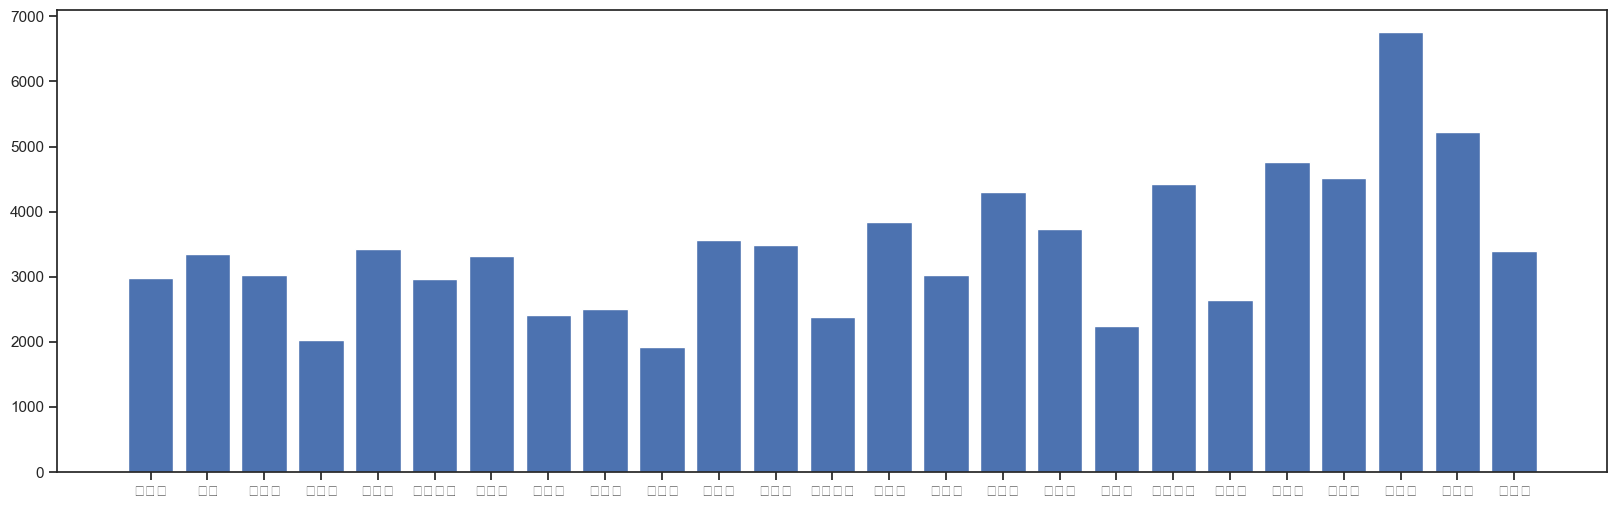

In [205]:
plt.figure(figsize=(20,6))
x=crime_gu['구별']
y=crime_gu['소계_발생']
plt.bar(x,y)

In [206]:
cctv.head()

,자치구,안심 주소,위도,경도,CCTV 수량,수정 일시
0,중랑구,중화2동 322-16(고정2)_C-JH02-0003-B,37.5963,127.0739,1,2022-12-01
1,중랑구,신내2동 651(고정4)_929,37.6150,127.0889,1,2022-12-01
2,중랑구,중화2동 323-14 (초롱공원)_C-JH02-0023,37.5957,127.0732,1,2022-12-01
3,중랑구,신내2동 602-1 (시조목 관리 보조)_C-SN02-0001-A,37.6066,127.0919,1,2022-12-01
4,중랑구,중화2동 323-14(고정1)_C-JH02-0023-A,37.5957,127.0732,1,2022-12-01


In [207]:
cctv_gu=pd.DataFrame(cctv.groupby('자치구')['CCTV 수량'].sum())

In [208]:
cctv_gu=cctv_gu.rename(columns={'CCTV 수량':'CCTV'})
cctv_gu.reset_index(inplace=True)
cctv_gu.rename(columns={'자치구':'구별'},inplace=True)

In [209]:
cctv_gu.head()

,구별,CCTV
0,강남구,7009
1,강동구,3191
2,강북구,2858
3,강서구,3481
4,관악구,5366


앞에 행들을 skip하는 방법

In [210]:
people_gu=people.iloc[4:,:]

In [211]:
people_gu=people_gu[people_gu['항목']=='계']

In [212]:
people_gu.rename(columns={'동별(1)':'구별','2025 2/4':'인구수'},inplace=True)

### 데이터 타입을 바꿔주는 방법 
- astype, to_numeric

In [213]:
people_gu['인구수']=people_gu['인구수'].astype(float)
people_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 4 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   항목      25 non-null     object 
 2   인구수     25 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [214]:
people_gu['인구수'] = pd.to_numeric(people_gu['인구수'], errors='coerce')
people_gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 4 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   항목      25 non-null     object 
 2   인구수     25 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


<BarContainer object of 25 artists>

c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\paint\OneDrive\Desktop\Githubproject\Dataviz\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing fro

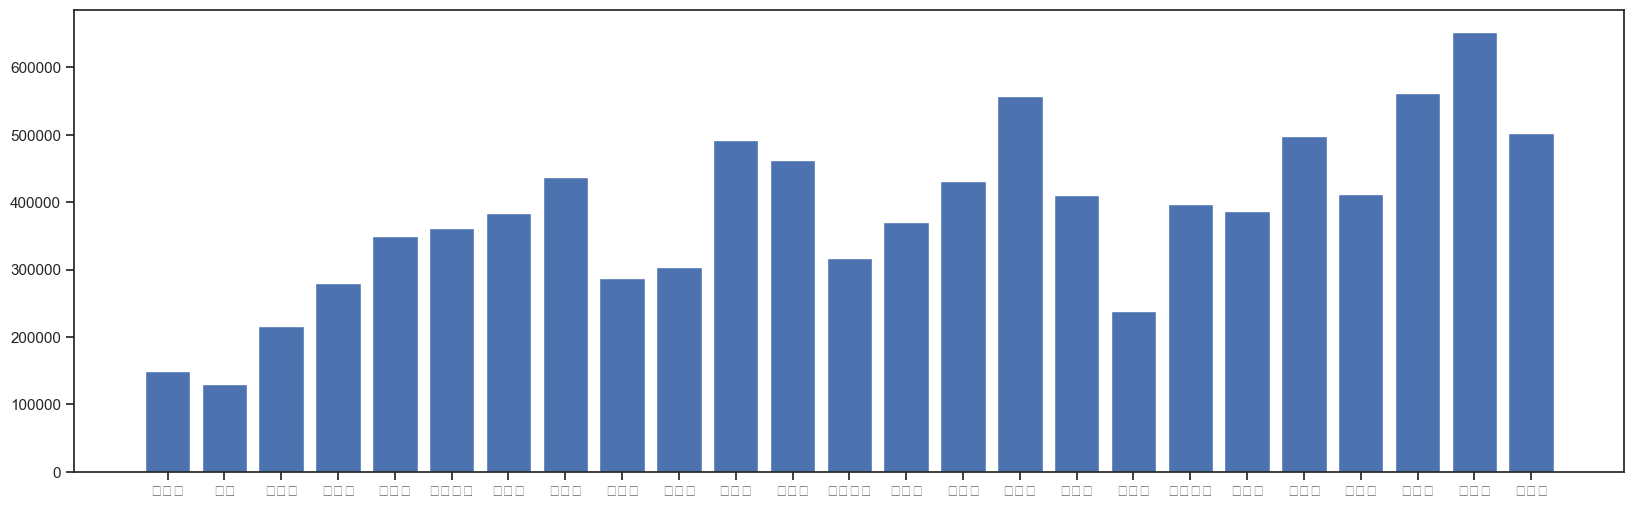

In [215]:
x=people_gu['구별']
y=people_gu['인구수']
plt.figure(figsize=(20,6))
plt.bar(x,y)

### 데이터 프레임 병합
- pd.merge 사용

In [216]:
data=pd.merge(crime_gu,cctv_gu,on='구별') #on 옆에 공통열

how 옵션도 사용 가능
- left
- right
- outer
- inner
사용 가능 

### 파생 변수 생성
- assign() 매서드 사용

In [217]:
data_result=data.assign(
    범죄대비CCTV= data['CCTV']/data['소계_발생']*100
)
data_result[['구별','범죄대비CCTV']].head(5)

,구별,범죄대비CCTV
0,종로구,64.743375
1,중구,69.772999
2,용산구,35.683548
3,성동구,199.505685
4,광진구,119.480140


In [218]:
data['범죄CCTV'] = data.apply(
    lambda r: (r['CCTV'] / r['소계_발생'] * 100) if r['소계_발생'] > 0 else np.nan,
    axis=1
)


In [219]:
data.head()

,구별,소계_발생,살인_발생,강도_발생,강간·강제추행_발생,절도_발생,폭력_발생,CCTV,범죄CCTV
0,종로구,2981,5,5,239,1169,1563,1930,64.743375
1,중구,3348,3,6,212,1520,1607,2336,69.772999
2,용산구,3021,3,3,245,978,1792,1078,35.683548
3,성동구,2023,2,2,119,893,1007,4036,199.505685
4,광진구,3424,2,5,238,1616,1563,4091,119.480140


## Matplotlib

([<matplotlib.axis.XTick at 0x24d48147d10>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200')])

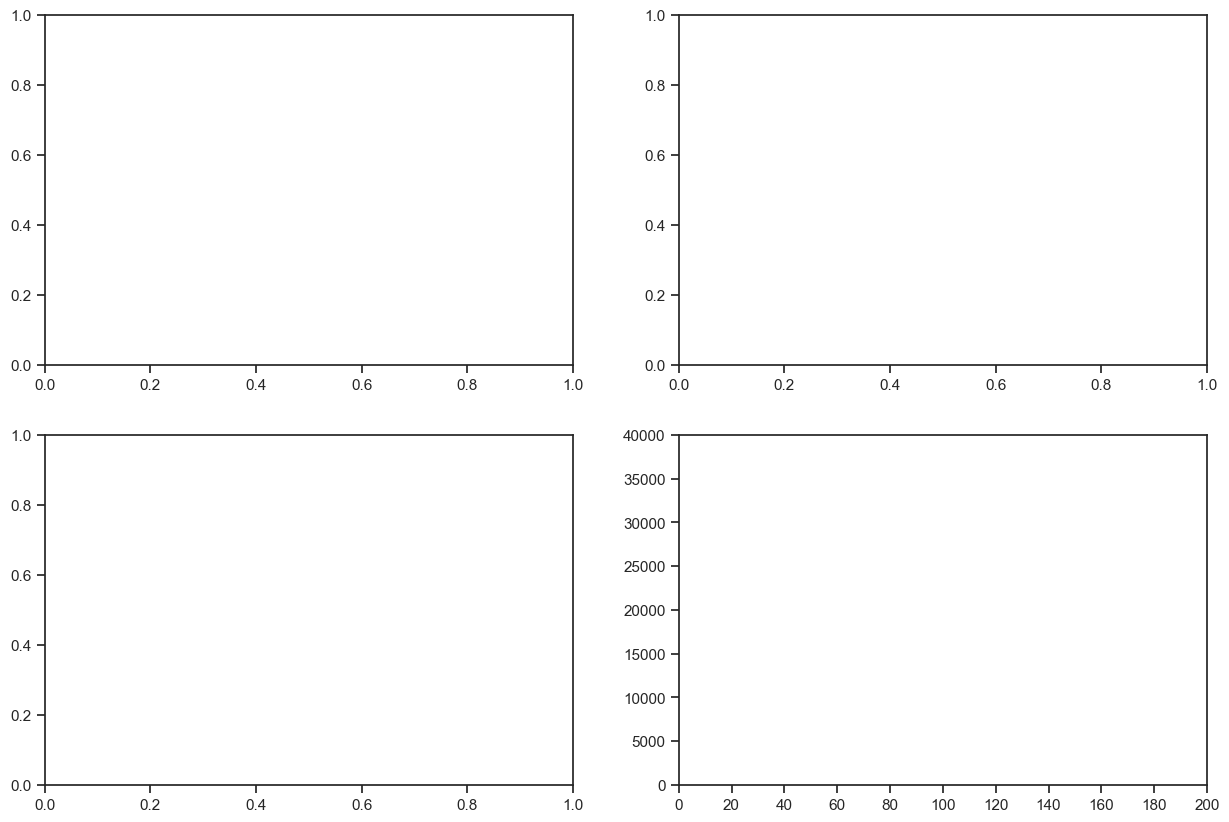

In [220]:
import matplotlib.pyplot as plt
fig, axes =plt.subplots(nrows=2,ncols=2, figsize=(15,10))

plt.xlim(0,200)
plt.ylim(0,40000)
plt.yticks(np.arange(0,40001,5000)) #y축 눈금
plt.xticks(np.arange(0,201,20)) #x축 눈금


그래프 전역 설정

In [221]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=100
plt.rcParams['font.family']='NanumGothic'

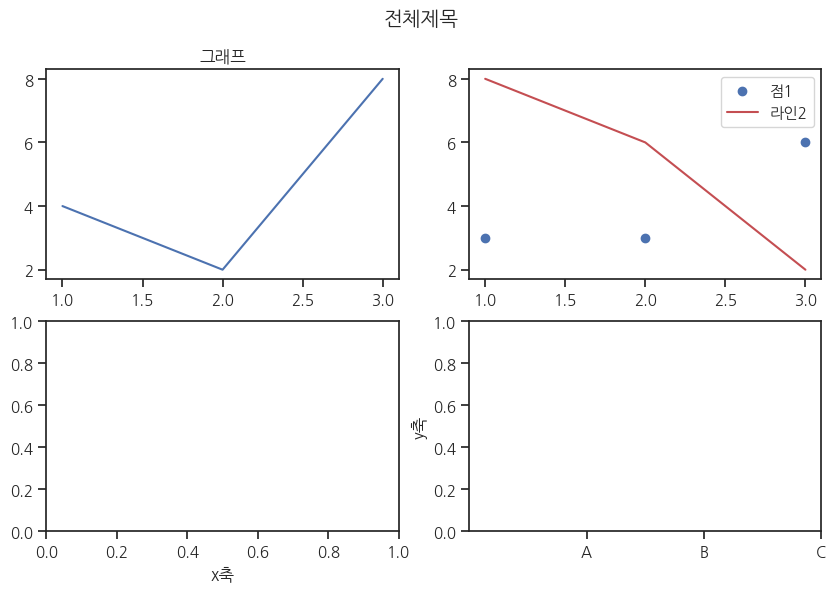

In [222]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.suptitle('전체제목')

ax[0,0].plot([1,2,3],[4,2,8],label='라인1')
ax[0,1].scatter([1,2,3],[3,3,6],label='점1')
ax[0,1].plot([1,2,3],[8,6,2],label='라인2', color='r')

ax[0,0].set_title('그래프')
ax[1,0].set_xlabel('x축')
ax[1,1].set_ylabel('y축')
plt.xticks([1,2,3],['A','B','C']) #마지막 그래프에만 적용됨

ax[0,1].legend(loc='upper right')

plt.show()

In [223]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

x축, y축 공유 : sharex, sharey

C:\Users\paint\AppData\Local\Temp\ipykernel_16248\1494312628.py:10: MatplotlibDeprecationWarning: Passing the notch parameter of boxplot() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[0,0].boxplot([1,2,3,4,5,6,6],[2,3,4,5,6,7,8])


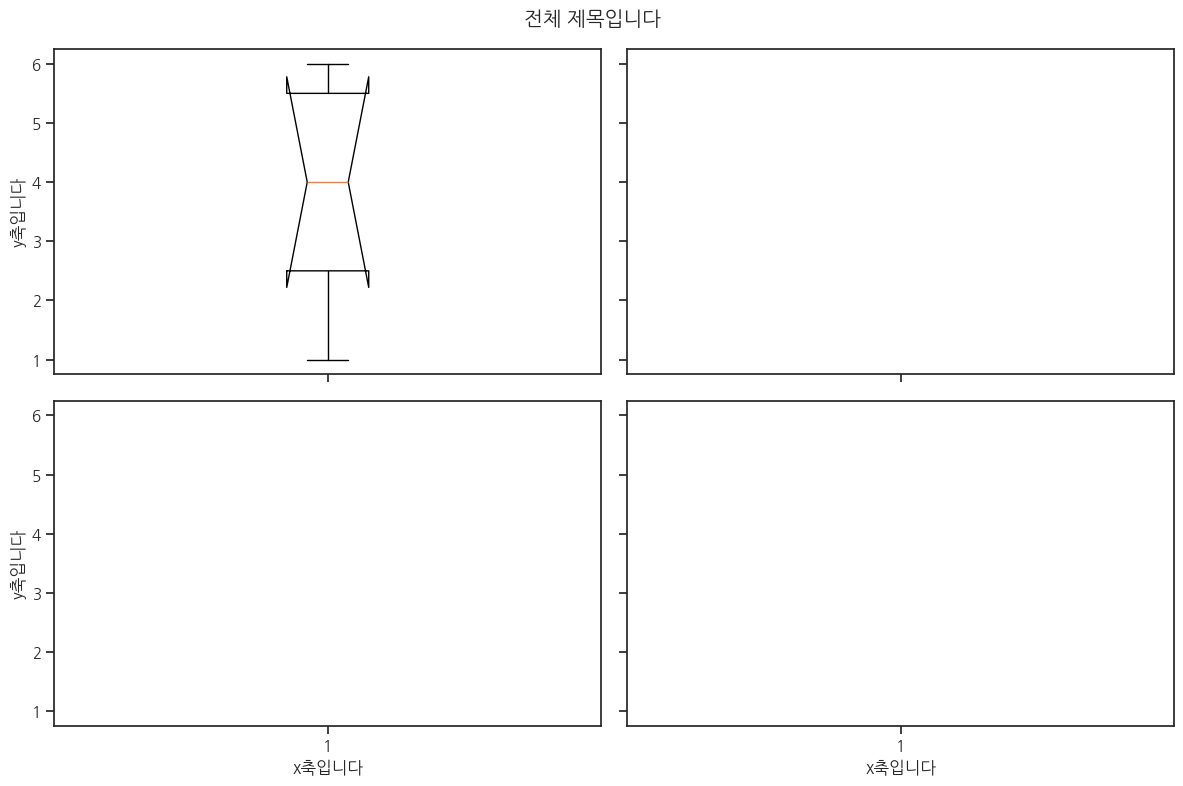

In [224]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    sharex=True,
    sharey=True,
    subplot_kw={'xlabel':'x축입니다','ylabel':'y축입니다'},
    figsize=(12,8)
)
fig.suptitle('전체 제목입니다')
ax[0,0].boxplot([1,2,3,4,5,6,6],[2,3,4,5,6,7,8])
plt.tight_layout()

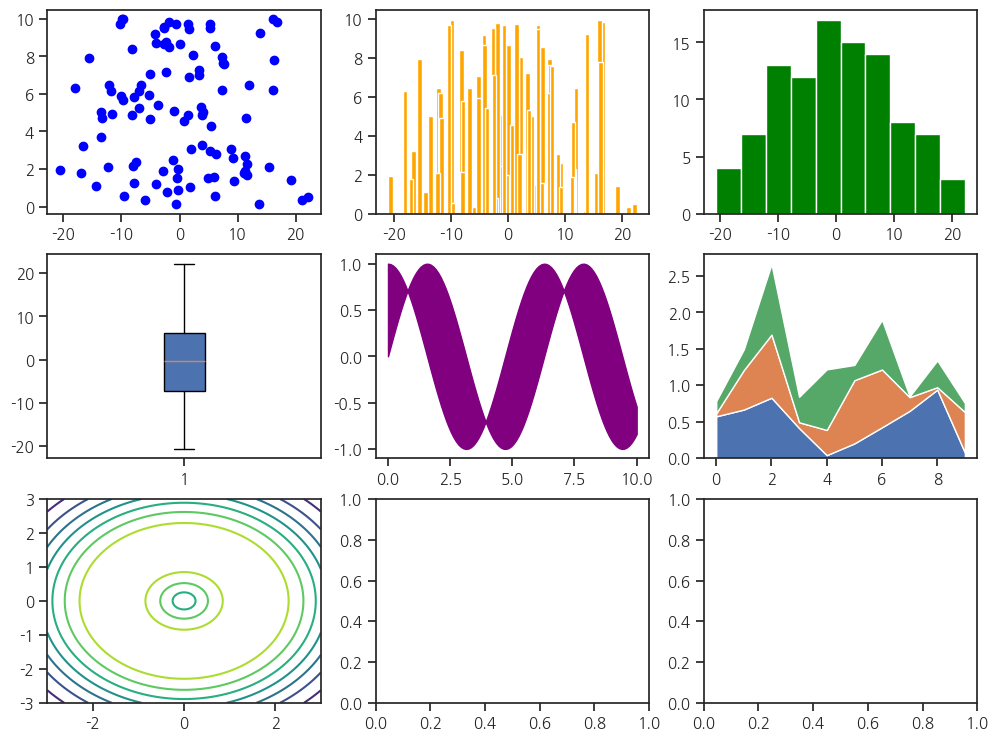

In [225]:
x=np.random.randn(100)*10
y=np.random.rand(100)*10

fig,ax=plt.subplots(3,3,figsize=(12,9))
ax[0,0].scatter(x,y,color='blue',label='산점도')
ax[0,1].bar(x,y,color='orange',label='막대그래프')
ax[0,2].hist(x,color='green',label='히스토그램')
ax[1,0].boxplot(x,vert=True,patch_artist=True)
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)
ax[1,1].fill_between(x,y1,y2,color='purple')
y1=np.random.rand(10)
y2=np.random.rand(10)
y3=np.random.rand(10)
ax[1,2].stackplot(range(10),y1,y2,y3)#누적형그래프
X,Y=np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
z=np.sin(np.sqrt(X**2+Y**2))
ax[2,0].contour(X,Y,z,cmap='viridis') #등고선 그래프


### 회귀선을 추가
- np.polyfit(x,y,deg) 함수 사용해 계수 구하기,deg는 차수
- np.poly1d() 함수 사용해서 회귀함수 생성

## Seaborn

In [226]:
# 20행 6열의 정규분포를 따르는 랜덤 데이터 생성하고 (0~5)/2를 오프셋으로 추가
data = np.random.normal(size=(20, 6)) + np.arange(6)/2 #값을 직접 가지고 있게 할 때 arange사용
#20행 6열로 값을 만든 후 1행 6열짜리를 더하라 하면 연산 시 사이즈가 맞지 않기 때문에 
#broadcasting해서 연산함
#broadcasting : 골고루 뿌려주는 것, 모든 행에 더해줌

#np.array+np.array를 했기 때문에 df로 변환해줌
df=pd.DataFrame(data, columns=[f'X{i}' for i in range(1,7)])#list comprehension 사ㅏ용
df.head()

,X1,X2,X3,X4,X5,X6
0,-0.200167,0.217478,0.262586,1.865351,2.139362,2.258860
1,1.211765,-0.220759,1.163380,-0.797844,2.133713,2.291022
2,2.047698,-0.984510,2.102525,1.058631,2.677932,3.024928
3,-1.194151,-0.565322,1.500382,0.795066,2.679825,1.297642
4,2.075553,-0.246882,1.260612,0.886955,2.359607,3.239859


<Axes: >

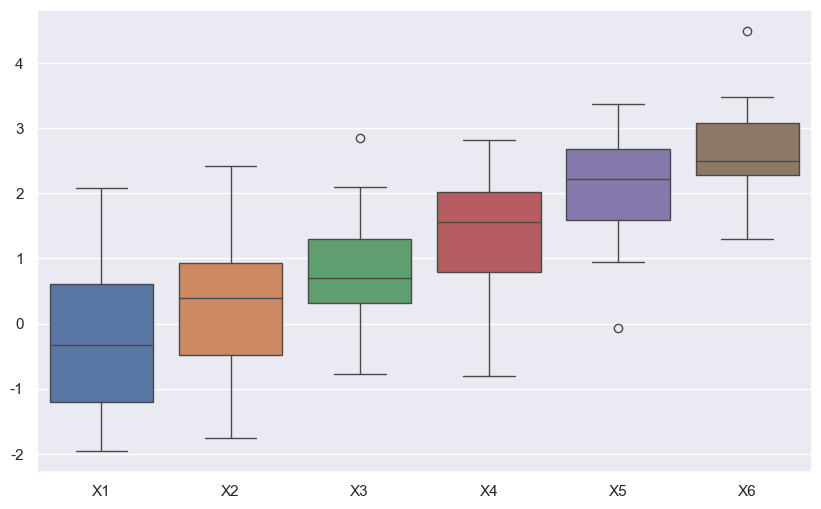

In [227]:
sns.set_theme(style='darkgrid') #darkgrid, whitegrid, dark, white, ticks 등이 있음
plt.figure()
sns.boxplot(df)

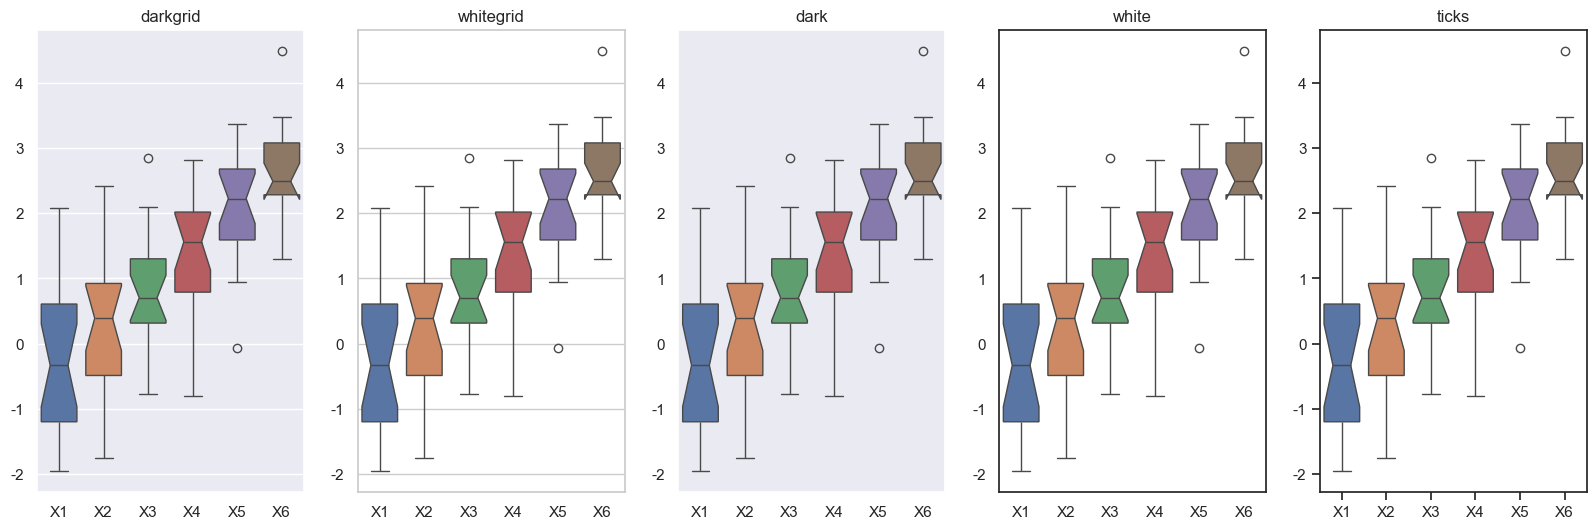

In [228]:
style_list=['darkgrid','whitegrid','dark','white','ticks']
fig=plt.figure(figsize=(20,6))
for i in range(len(style_list)):
    ax=sns.set_theme(style=style_list[i])
    ax=fig.add_subplot(1,len(style_list),i+1)#여기 i+1은 위치를 말하는 것으로 1부터 시작한다
    ax= sns.boxplot(df,
                    notch=True).set_title(style_list[i]) #notch : 중앙값을 기준으로 오차범위 표시

pairplot, kind지정    > 숫자형 컬럼끼리 짝지어 모든 그래프 생성       
jointplot, kind지정     > X,Y 지정하면 kind로 지정한 그래프와 히스토그램을 함께 볼 수 있음

sns.FacetGrid(data,row,col,hue,height,aspect).map_dataframe(sns.scatterplot,x,y).add_legend() > 서브플랏 그리는 함수

sns.regplot(data,x,y)> 회귀선 구해줌

annot(글씨 쓸 지 여부)